In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

# 2005 tree census

In [34]:
districts = gpd.read_file('../data/shapefiles/nycd_22a/nycd.shp')
# source: https://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

trees05_1 = pd.read_csv('../data/tree_census/clean_tree_census2005_PART1.csv')
trees05_2 = pd.read_csv('../data/tree_census/clean_tree_census2005_PART2.csv')
trees05 = pd.concat([trees05_1, trees05_2])

trees05.drop(columns='Unnamed: 0', inplace=True)
trees05.shape

In [36]:
trees05.head()

,year,est_address,tree_status_05,spc_latin,spc_common,sidw_damage,zip_code,borough,nta_name,latitude,longitude,alive
0,2005,1139 57 STREET,Good,Pyrus calleryana,callery pear,0,11219,3,Borough Park,40.632653,-74.000245,1
1,2005,2220 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.620084,-73.901453,1
2,2005,2360 BERGEN AVENUE,Good,Acer platanoides crimson king,norway-cr kng maple,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.617996,-73.899111,1
3,2005,2254 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.619694,-73.901003,1
4,2005,2332 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.618323,-73.899467,1


In [37]:
trees05[['longitude', 'latitude']].describe()

,longitude,latitude
count,592372.000000,592372.000000
mean,-72.821620,40.089110
std,8.963936,4.935053
min,-74.254886,0.000000
25%,-73.983314,40.624190
50%,-73.908728,40.696155
75%,-73.822377,40.755902
max,0.000000,40.912572


In [38]:
# Some latitude and longitude are not given. How many?
missing_latlong = trees05[(trees05['longitude'] == 0) | (trees05['latitude'] == 0)]
print(f"Pct missing lat/long: {missing_latlong.shape[0] / trees05.shape[0]}")

# Drop rows
trees05.drop(missing_latlong.index, inplace=True)

Pct missing lat/long: 0.014923055107263678


In [39]:
# Set up GeoDataFrame
geometry = [Point(xy) for xy in zip(trees05['longitude'], trees05['latitude'])]
trees05_gdf = gpd.GeoDataFrame(trees05, geometry=geometry, crs="epsg:4326")

# Match CRS
trees05_gdf.to_crs(epsg=2263, inplace=True)
trees05_gdf.head()

,year,est_address,tree_status_05,spc_latin,spc_common,sidw_damage,zip_code,borough,nta_name,latitude,longitude,alive,geometry
0,2005,1139 57 STREET,Good,Pyrus calleryana,callery pear,0,11219,3,Borough Park,40.632653,-74.000245,1,POINT (984182.000 169769.001)
1,2005,2220 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.620084,-73.901453,1,POINT (1011607.999 165205.001)
2,2005,2360 BERGEN AVENUE,Good,Acer platanoides crimson king,norway-cr kng maple,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.617996,-73.899111,1,POINT (1012259.000 164444.999)
3,2005,2254 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.619694,-73.901003,1,POINT (1011732.999 165063.000)
4,2005,2332 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,Georgetown-Marine Park-Bergen Beach-Mill Basin,40.618323,-73.899467,1,POINT (1012160.000 164563.998)


<AxesSubplot:>

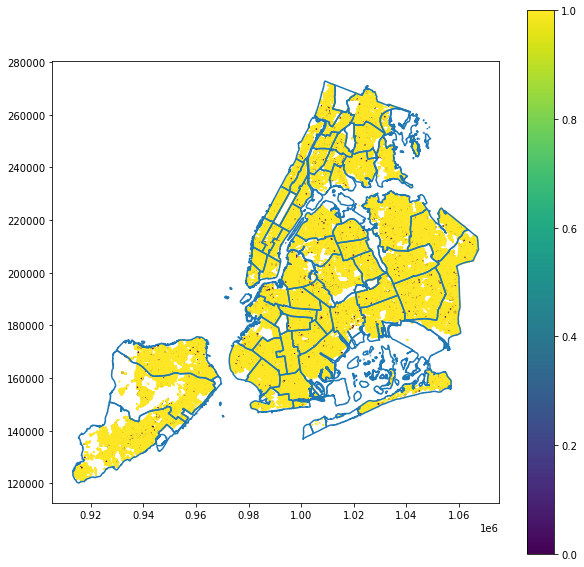

In [40]:
# Test plot
fig, ax = plt.subplots(figsize=(10, 10))
trees05_gdf.plot(column='alive', ax=ax, markersize=.5, legend=True, alpha=.8, vmin=0, vmax=1)
districts.boundary.plot(ax=ax)

In [41]:
# Spatial join

gdf_05 = trees05_gdf.sjoin(districts, how='left')
gdf_05.drop(columns=['index_right','nta_name'], inplace=True)
gdf_05.rename(columns = {'borough_left': 'borough'}, inplace=True)

In [48]:
no_cdmatch

,year,est_address,tree_status_05,spc_latin,spc_common,sidw_damage,zip_code,borough_left,latitude,longitude,alive,geometry,BoroCD,Shape_Leng,Shape_Area,borough_right,BoroCD_name
193,2005,1 STATE STREET,Good,Gleditsia triacanthos,honeylocust,0,0,1,40.736136,-74.012972,1,POINT (980654.999 207471.001),NaN,NaN,NaN,NaN,NaN
264,2005,1 STATE STREET,Good,Gleditsia triacanthos,honeylocust,0,0,1,40.736136,-74.012972,1,POINT (980654.999 207471.001),NaN,NaN,NaN,NaN,NaN
282,2005,1 STATE STREET,Good,Gleditsia triacanthos,honeylocust,0,0,1,40.736136,-74.012972,1,POINT (980654.999 207471.001),NaN,NaN,NaN,NaN,NaN
26493,2005,4040 MACOMBS DAM BRIDGE,Good,Quercus palustris,pin oak,1,0,1,40.828088,-73.933835,1,POINT (1002560.999 240978.999),NaN,NaN,NaN,NaN,NaN
26498,2005,4040 MACOMBS DAM BRIDGE,Good,Quercus palustris,pin oak,1,0,1,40.828088,-73.933835,1,POINT (1002560.999 240978.999),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184749,2005,25510 UPLAND ROAD,Poor,Unknown,unknown,0,11362,4,40.768085,-73.726737,1,POINT (1059943.000 219229.002),NaN,NaN,NaN,NaN,NaN
184754,2005,25510 UPLAND ROAD,Excellent,Acer platanoides,norway maple,0,11362,4,40.768085,-73.726737,1,POINT (1059943.000 219229.002),NaN,NaN,NaN,NaN,NaN
185302,2005,5010 CONCORD STREET,Excellent,Pyrus calleryana,callery pear,0,11362,4,40.769934,-73.729650,1,POINT (1059134.001 219900.001),NaN,NaN,NaN,NaN,NaN
288491,2005,515 SURF AVENUE,Excellent,Pyrus calleryana,callery pear,0,0,5,40.496898,-74.244703,1,POINT (916191.999 120405.001),NaN,NaN,NaN,NaN,NaN


In [50]:
no_cdmatch = gdf_05[gdf_05['BoroCD'].isna()]
print(no_cdmatch[['borough']].value_counts())

# Since total is less than 100, we'll drop these rows as well
gdf_05.drop(no_cdmatch.index, inplace=True)

borough
4          57
1          16
2           7
5           2
3           1
dtype: int64


In [51]:
# Make CD an integer
gdf_05['BoroCD'] = gdf_05['BoroCD'].map(lambda x: int(x))
gdf_05.head()

,year,est_address,tree_status_05,spc_latin,spc_common,sidw_damage,zip_code,borough,latitude,longitude,alive,geometry,BoroCD,Shape_Leng,Shape_Area,borough_right,BoroCD_name
0,2005,1139 57 STREET,Good,Pyrus calleryana,callery pear,0,11219,3,40.632653,-74.000245,1,POINT (984182.000 169769.001),312,52245.830805,9.952550e+07,3.0,Borough Park (CD12)
1,2005,2220 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,40.620084,-73.901453,1,POINT (1011607.999 165205.001),318,188015.597479,2.354204e+08,3.0,Flatlands and Canarsie (CD18)
2,2005,2360 BERGEN AVENUE,Good,Acer platanoides crimson king,norway-cr kng maple,0,11234,3,40.617996,-73.899111,1,POINT (1012259.000 164444.999),318,188015.597479,2.354204e+08,3.0,Flatlands and Canarsie (CD18)
3,2005,2254 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,40.619694,-73.901003,1,POINT (1011732.999 165063.000),318,188015.597479,2.354204e+08,3.0,Flatlands and Canarsie (CD18)
4,2005,2332 BERGEN AVENUE,Good,Platanus acerifolia,london planetree,0,11234,3,40.618323,-73.899467,1,POINT (1012160.000 164563.998),318,188015.597479,2.354204e+08,3.0,Flatlands and Canarsie (CD18)


In [62]:
# Repeat EDA steps for 2005 

# Create DF with summary stats for each CD
tree_stats_05 = gdf_05.groupby('BoroCD_name')[['BoroCD', 'borough', 'Shape_Area','alive']].mean()

# Set numeric CD as index
tree_stats_05.reset_index(inplace=True)
tree_stats_05.set_index('BoroCD', inplace=True)
tree_stats_05.index = tree_stats_05.index.astype(int)

# Convert floats to integers
#tree_stats.index = tree_stats.index.astype(int)
tree_stats_05['borough'] = tree_stats_05['borough'].astype(int)

# Rename columns
tree_stats_05.rename(columns={
                           'BoroCD_name': 'CD_name', 
                           'Shape_Area': 'CD_area'}, inplace=True)

# Add more columns
tree_stats_05['tree_count'] = gdf_05.groupby('BoroCD_name')['spc_common'].count().values
tree_stats_05['tree_density'] = tree_stats_05['tree_count'] / tree_stats_05['CD_area'] * 10**6
tree_stats_05['n_species'] = gdf_05.groupby('BoroCD_name')['spc_latin'].nunique().values

In [72]:
tree_stats_05.to_csv('../data/tree_census/tree_summary_by_cd_2005.csv')
tree_stats_05

,CD_name,borough,CD_area,alive,tree_count,tree_density,n_species
BoroCD,,,,,,,
310,Bay Ridge and Dyker Heights (CD10),3,1.113457e+08,0.990761,10391,93.321941,94
411,Bayside and Little Neck (CD11),4,2.603629e+08,0.989736,27963,107.400079,108
303,Bedford Stuyvesant (CD3),3,7.946150e+07,0.988896,5854,73.670895,70
206,Belmont and East Tremont (CD6),2,4.266431e+07,0.967291,2721,63.776958,61
311,Bensonhurst (CD11),3,1.032108e+08,0.993021,7737,74.963113,84
...,...,...,...,...,...,...,...
107,Upper West Side (CD7),1,5.315258e+07,0.988377,7743,145.674951,70
226,Van Cortlandt Park,2,5.056599e+07,0.946903,113,2.234704,20
112,Washington Heights and Inwood (CD12),1,7.796431e+07,0.980108,3720,47.714143,60


In [65]:
tree_stats

,CD_name,borough,CD_area,mean_tree_diam,alive,tree_count,tree_density,n_species
BoroCD,,,,,,,,
310,Bay Ridge and Dyker Heights (CD10),3,1.113457e+08,13.977268,0.955308,9062,81.386145,107
411,Bayside and Little Neck (CD11),4,2.603629e+08,14.125527,0.958932,23230,89.221608,128
303,Bedford Stuyvesant (CD3),3,7.946150e+07,10.315858,0.969856,6104,76.817073,104
206,Belmont and East Tremont (CD6),2,4.266431e+07,7.264135,0.949367,3555,83.324912,101
311,Bensonhurst (CD11),3,1.032108e+08,13.350786,0.964307,8461,81.977886,114
312,Borough Park (CD12),3,9.952550e+07,12.469460,0.959534,10478,105.279552,116
316,Brownsville (CD16),3,5.176892e+07,10.493929,0.955984,4612,89.088207,92
304,Bushwick (CD4),3,5.666261e+07,8.192430,0.948723,5363,94.647947,95
110,Central Harlem (CD10),1,3.908619e+07,8.188345,0.960978,3844,98.346757,79


In [69]:
trees05['alive'].value_counts(normalize=True)

1    0.986359
0    0.013641
Name: alive, dtype: float64